# Box Office Mojo EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/kibbles/anaconda3/envs/metis/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Import data and inspect

In [21]:
path=('./data/mojo_all_years_movies_cleaned.pkl')
df = pd.read_pickle(path)
df

,Movie_Title,Domestic_Distributor,Domestic_Total_Gross,Runtime,Rating,Release_Date,Budget,Cast1,Cast2,Cast3,...,Writer_Score,Producer_Score,Cinematographer_Score,Domestic_Distributor_Score,Cast1_Score,Cast2_Score,Cast3_Score,Cast4_Score,Log_DTG,Log_Bud
0,Inside the Rain,Sky Island Films,8140,90.0,NaN,2020-03-13,NaN,Rosie Perez,Eric Roberts,Aaron Fisher,...,0.000000,8.737934,0.000000,11.629045,11.063877,14.496685,0.000000,0.000000,9.004545,NaN
1,The Hunt,Universal Pictures,5812500,90.0,R,2020-03-13,14000000.0,Betty Gilpin,Hilary Swank,Ike Barinholtz,...,0.000000,17.145732,0.000000,17.263232,0.000000,16.003221,17.915033,0.000000,15.575521,16.454568
2,Never Rarely Sometimes Always,Focus Features,16565,101.0,PG-13,2020-03-13,NaN,Eliazar Jimenez,David Buneta,Christian Clements,...,12.444278,0.000000,11.191300,16.093152,0.000000,0.000000,0.000000,0.000000,9.715047,NaN
3,Moondance,,2371,97.0,NaN,2020-03-13,NaN,Adam Conover,Cooper Flannigan,Sam Jones,...,0.000000,0.000000,0.000000,9.879297,0.000000,0.000000,0.000000,0.000000,7.771067,NaN
4,The Roads Not Taken,Bleecker Street Media,3518,85.0,R,2020-03-13,NaN,Javier Bardem,Elle Fanning,Salma Hayek,...,13.689267,13.892649,12.623175,14.988554,14.622493,15.549776,13.479712,11.972948,8.165648,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15968,Modern Times,United Artists,163577,87.0,NaN,1936-02-05,NaN,Charles Chaplin,Paulette Goddard,Henry Bergman,...,9.861675,0.000000,0.000000,9.861675,9.861675,0.000000,0.000000,0.000000,12.005039,NaN
15969,M,Foremco Pictures Corporation,35566,117.0,NaN,1933-03-31,NaN,Peter Lorre,Ellen Widmann,Inge Landgut,...,14.027525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.479145,NaN
15970,City Lights,United Artists,19181,87.0,G,1931-01-30,NaN,Charles Chaplin,Virginia Cherrill,Florence Lee,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.861675,NaN
15971,Metropolis,Paramount Pictures,1236166,153.0,NaN,1927-05-06,NaN,Brigitte Helm,Alfred Abel,Gustav Fröhlich,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.027525,NaN


In [22]:
df.describe()

,Domestic_Total_Gross,Runtime,Budget,Intercept,Profit_percent,G,NC-17,Not Rated,PG,PG-13,...,Writer_Score,Producer_Score,Cinematographer_Score,Domestic_Distributor_Score,Cast1_Score,Cast2_Score,Cast3_Score,Cast4_Score,Log_DTG,Log_Bud
count,1.597300e+04,15560.000000,3.331000e+03,15973.0,3331.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,...,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,3331.000000
mean,1.812206e+07,104.641324,4.546919e+07,1.0,5.060121,0.005822,0.001377,0.002442,0.079947,0.170100,...,4.951516,6.745515,9.194261,12.606533,7.702929,6.284221,5.031511,3.907391,13.537541,17.020257
std,4.731340e+07,23.212232,4.675174e+07,0.0,139.289844,0.076084,0.037088,0.049354,0.271220,0.375732,...,7.257142,7.712180,7.310265,4.685651,7.904419,7.757025,7.433108,6.869402,3.228295,1.400118
min,7.200000e+01,61.000000,2.200000e+02,1.0,-0.999926,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.276666,5.393628
25%,5.145600e+04,91.000000,1.350000e+07,1.0,-0.506871,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.944471,0.000000,0.000000,0.000000,0.000000,10.848482,16.418200
50%,6.946000e+05,100.000000,3.000000e+07,1.0,0.075138,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,12.318175,13.395422,0.000000,0.000000,0.000000,0.000000,13.451091,17.216708
75%,1.419523e+07,112.000000,6.000000e+07,1.0,1.137217,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.972480,15.309379,15.925474,16.453006,16.164569,15.527224,14.004804,7.563201,16.468416,17.909855
max,9.366622e+08,808.000000,3.560000e+08,1.0,7193.587333,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.948905,20.092487,19.926202,19.035464,20.657833,20.657833,20.098215,20.657833,20.657833,19.690441


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15973 entries, 0 to 15972
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Movie_Title           15973 non-null  object        
 1   Domestic_Distributor  15623 non-null  object        
 2   Domestic_Total_Gross  15973 non-null  int64         
 3   Runtime               15560 non-null  float64       
 4   Rating                8964 non-null   object        
 5   Release_Date          15973 non-null  datetime64[ns]
 6   Budget                3331 non-null   float64       
 7   Cast1                 15691 non-null  object        
 8   Cast2                 15536 non-null  object        
 9   Cast3                 15422 non-null  object        
 10  Cast4                 15300 non-null  object        
 11  Director              15684 non-null  object        
 12  Writer                14848 non-null  object        
 13  Producer        

# Examine films with budgets (WIP)

In [30]:
subset = ['Domestic_Total_Gross','Director_Score','Budget','Runtime']
df.dropna(subset=subset)

,Movie_Title,Domestic_Distributor,Domestic_Total_Gross,Runtime,Rating,Release_Date,Budget,Cast1,Cast2,Cast3,...,Cinematographer,Profit_percent,G,NC-17,Not Rated,PG,PG-13,R,Director_Score,Distributor_Score
1,The Hunt,Universal Pictures,5812500,90.0,R,2020-03-13,14000000.0,Betty Gilpin,Hilary Swank,Ike Barinholtz,...,Darran Tiernan,-0.584821,0,0,0,0,0,1,14.265831,17.769855
9,Bloodshot,Sony Pictures Releasing,10021787,109.0,PG-13,2020-03-06,45000000.0,Vin Diesel,Eiza González,Sam Heughan,...,Jacques Jouffret,-0.777294,0,0,0,0,1,0,16.120272,17.799768
29,The Invisible Man,Universal Pictures,64914050,124.0,R,2020-02-26,7000000.0,Elisabeth Moss,Oliver Jackson-Cohen,Harriet Dyer,...,Stefan Duscio,8.273436,0,0,0,0,0,1,17.577561,17.769855
39,Brahms: The Boy II,STX Entertainment,12611536,86.0,PG-13,2020-02-20,10000000.0,Katie Holmes,Owain Yeoman,Christopher Convery,...,Karl Walter Lindenlaub,0.261154,0,0,0,0,1,0,17.255765,17.275507
50,The Photograph,Universal Pictures,20578185,106.0,PG-13,2020-02-14,16000000.0,LaKeith Stanfield,Chelsea Peretti,Courtney B. Vance,...,Mark Schwartzbard,0.286137,0,0,0,0,1,0,17.124215,17.769855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15958,Meet Me in St. Louis,Metro-Goldwyn-Mayer (MGM),403521,113.0,NaN,1944-11-28,1700000.0,Judy Garland,Margaret O'Brien,Mary Astor,...,George J. Folsey,-0.762635,0,0,0,0,0,0,12.723891,16.786438
15959,Casablanca,Warner Bros.,4108411,102.0,PG,1942-11-26,950000.0,Humphrey Bogart,Ingrid Bergman,Paul Henreid,...,Arthur Edeson,3.324643,0,0,0,1,0,0,14.739116,17.772378
15965,Mr. Smith Goes to Washington,Columbia Pictures,144738,129.0,NaN,1939-10-19,1900000.0,James Stewart,Jean Arthur,Claude Rains,...,Joseph Walker,-0.923822,0,0,0,0,0,0,11.882680,17.040867
15966,The Wizard of Oz,Metro-Goldwyn-Mayer (MGM),24790250,102.0,PG,1939-08-25,2777000.0,Judy Garland,Frank Morgan,Ray Bolger,...,Harold Rosson,7.926990,0,0,0,1,0,0,18.541317,16.786438


# Examine films without budgets (WIP)

# Examine Data

## heatmap

#### _

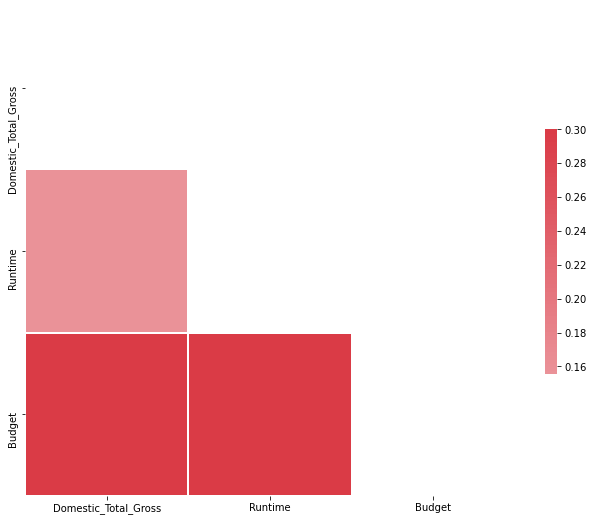

In [5]:
X = df[['Domestic_Total_Gross','Runtime']]
y = df['Budget']
corr = X.join(y, how = 'left').corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Pairplot

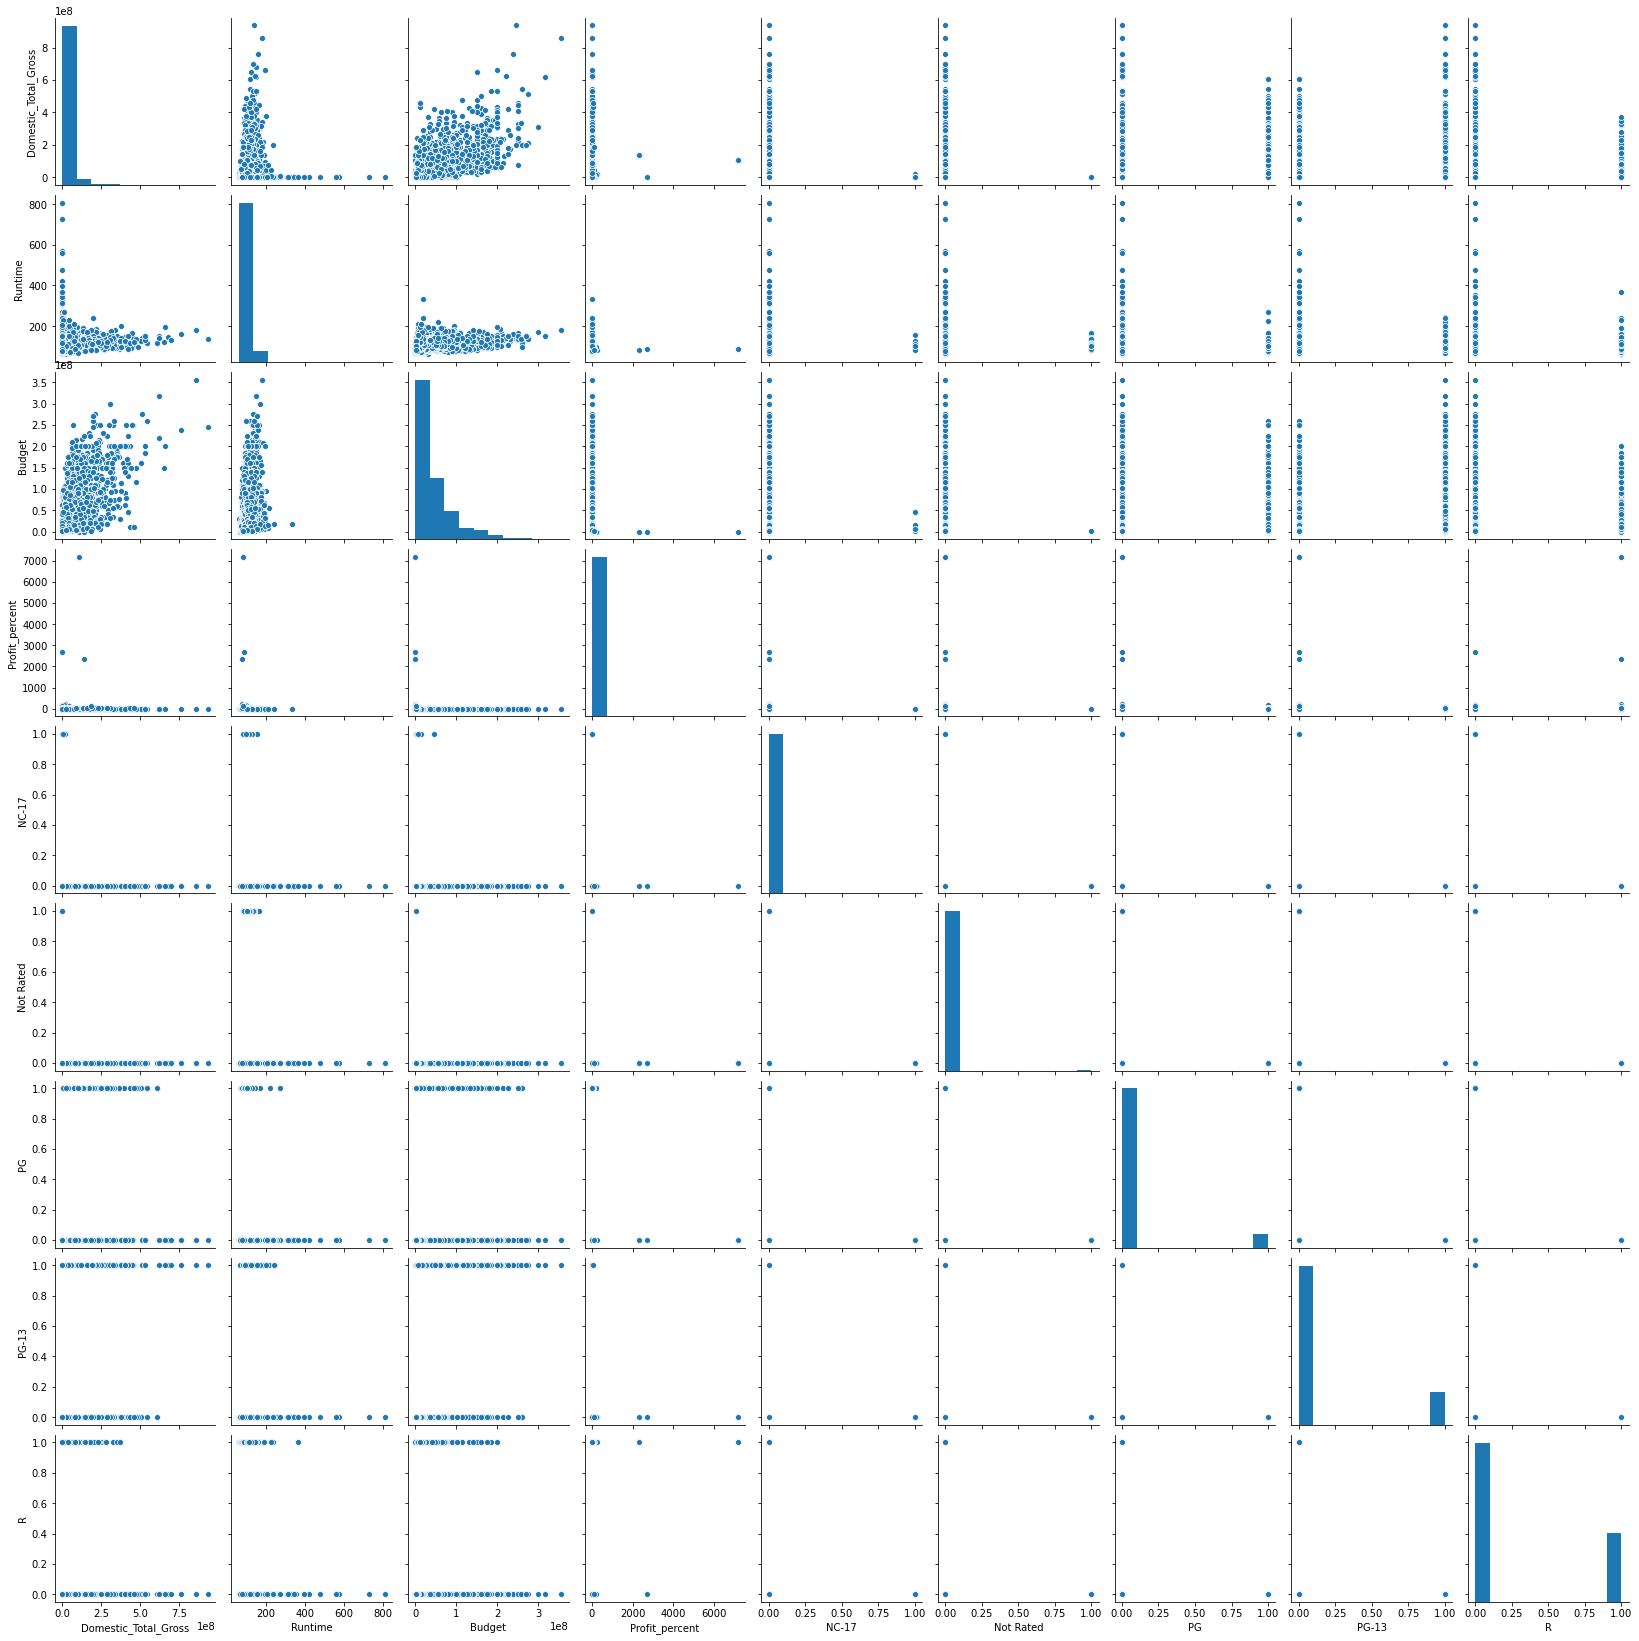

In [7]:
# TODO: remove ratings

sns.pairplot(df)

## Distributor

### Distributors by movie count

In [8]:
df['Domestic_Distributor'].value_counts().reset_index(drop=False).set_index('index')

,Domestic_Distributor
index,
Warner Bros.,844
Universal Pictures,663
Twentieth Century Fox,581
Walt Disney Studios Motion Pictures,578
Paramount Pictures,510
...,...
Audience Alliance Motion Picture Studios,1
Social Media Productions,1
Four of a Kind Productions,1


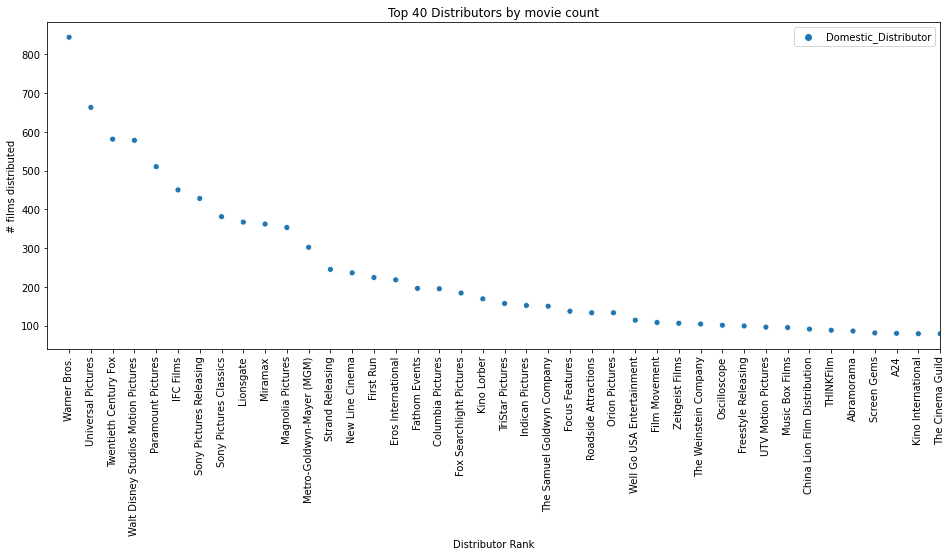

In [15]:
points = df['Domestic_Distributor'].value_counts().reset_index(drop=False).loc[:40]
plt.figure(figsize=(16,6))

ploot = sns.scatterplot(data = points.set_index('index'));
plt.xlim([-1,40]);plt.xticks(rotation=90);
plt.ylabel('# films distributed'); plt.xlabel('Distributor Rank'); plt.title('Top 40 Distributors by movie count');

Text(0.5, 1.0, '')

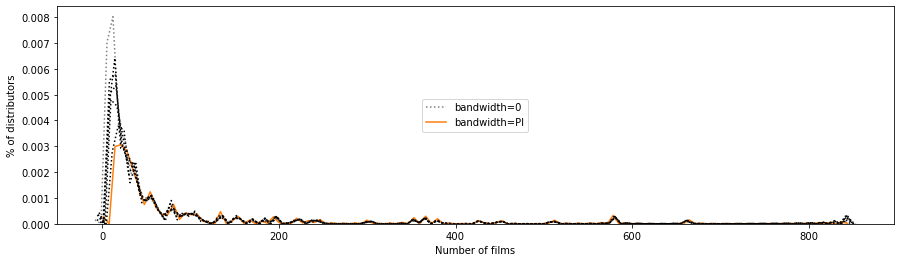

In [10]:
outliers = df['Domestic_Distributor'].value_counts()

f, ax = plt.subplots(figsize=(15, 4))
plt.xlabel('%')
sns.kdeplot( outliers , bw=np.pi, color='tab:gray', linestyle=':' )
sns.kdeplot( outliers , bw=0, color='tab:orange', linestyle='-' )
for bandwidth in range (11,2,-2):
    sns.kdeplot( outliers , bw=np.log(bandwidth), legend=False, color='k', linestyle=':' )
plt.ylabel('% of distributors')
plt.xlabel('Number of films')
plt.legend(['bandwidth=0', 'bandwidth=PI'], loc='center')
plt.title('')


### Distributors by Domestic Total Gross

In [16]:
points = (df.groupby(['Domestic_Distributor'])
            .sum()
            .sort_values(['Domestic_Total_Gross'], ascending=False)
            [['Domestic_Total_Gross']]
         )
points.index

Index(['Walt Disney Studios Motion Pictures', 'Warner Bros.',
       'Universal Pictures', 'Twentieth Century Fox', 'Paramount Pictures',
       'Sony Pictures Releasing', 'Lionsgate', 'New Line Cinema',
       'Metro-Goldwyn-Mayer (MGM)', 'Columbia Pictures',
       ...
       'KimStim/Zeitgeist Films', 'Kathi Arts', 'Exorcism The Movie, LLC',
       'Blue Llama Studios', 'M Star International', 'Yeah',
       'Seven Arts Distribution', 'Oilrag Productions', 'Lavendar House Films',
       'Phantom Pain Films'],
      dtype='object', name='Domestic_Distributor', length=1082)

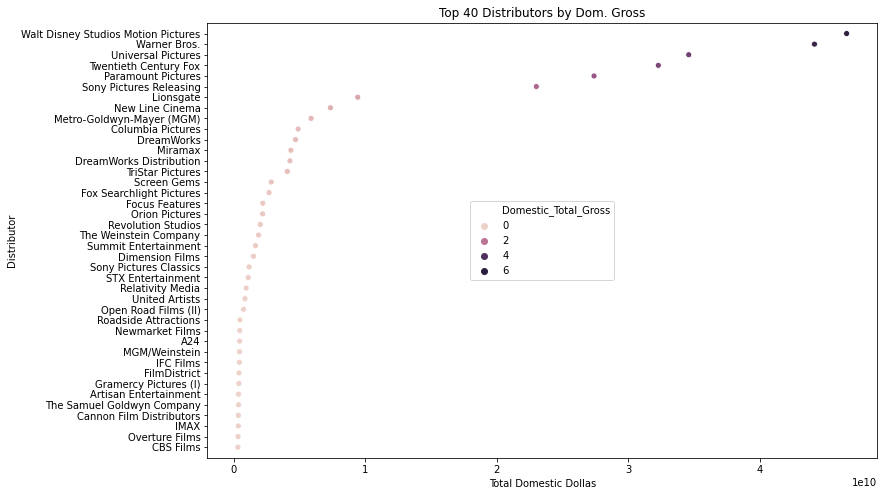

In [26]:
plt.figure(figsize=(12,8))
ploot = sns.scatterplot(data = points, y = points.index[:40], x = points['Domestic_Total_Gross'][:40], hue = points['Domestic_Total_Gross'][:40]);
plt.ylim([-1,40]);ploot.invert_yaxis();plt.legend(loc='center')
plt.ylabel('Distributor'); plt.xlabel('Total Domestic Dollas'); plt.title('Top 40 Distributors by Dom. Gross');


## Domestic Total Gross

### DTG by film, 1980-2020 unadjusted

In [11]:
df['Domestic_Total_Gross'].describe()

count    1.597300e+04
mean     1.812206e+07
std      4.731340e+07
min      7.200000e+01
25%      5.145600e+04
50%      6.946000e+05
75%      1.419523e+07
max      9.366622e+08
Name: Domestic_Total_Gross, dtype: float64

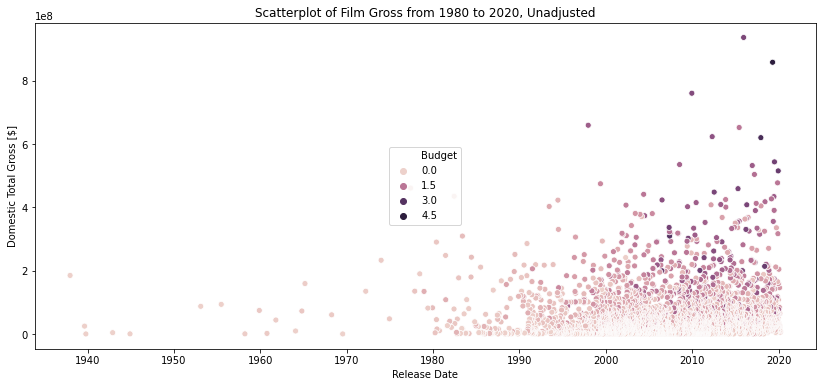

In [27]:
plt.subplots(figsize=(14,6))
plot = sns.scatterplot(data = df, x=df['Release_Date'], y=df['Domestic_Total_Gross'],hue = df['Budget'])
plt.legend(loc='center');
plt.ylabel('Domestic Total Gross [$]'); plt.xlabel('Release Date'); plt.title('Scatterplot of Film Gross from 1980 to 2020, Unadjusted');


## Budget

In [34]:
bud=(df.dropna(subset=['Budget'])
       .sort_values(['Budget'], ascending=False)
    )
bud

,Movie_Title,Domestic_Distributor,Domestic_Total_Gross,Runtime,Rating,Release_Date,Budget,Cast1,Cast2,Cast3,...,Director,Writer,Producer,Cinematographer,Profit_percent,NC-17,Not Rated,PG,PG-13,R
557,Avengers: Endgame,Walt Disney Studios Motion Pictures,858373000,181.0,PG-13,2019-04-24,356000000.0,Robert Downey Jr.,Chris Evans,Mark Ruffalo,...,Anthony Russo,Christopher Markus,Kevin Feige,Trent Opaloch,1.411160,0,0,0,1,0
1564,Star Wars: Episode VIII,Walt Disney Studios Motion Pictures,620181382,152.0,PG-13,2017-12-13,317000000.0,Daisy Ridley,John Boyega,Mark Hamill,...,Rian Johnson,Rian Johnson,Ram Bergman,Steve Yedlin,0.956408,0,0,0,1,0
8213,Pirates of the Caribbean: At World's End,Walt Disney Studios Motion Pictures,309420425,169.0,PG-13,2007-05-22,300000000.0,Johnny Depp,Orlando Bloom,Keira Knightley,...,Gore Verbinski,Ted Elliott,Jerry Bruckheimer,Dariusz Wolski,0.031401,0,0,0,1,0
102,Star Wars: Episode IX,Walt Disney Studios Motion Pictures,515202542,142.0,PG-13,2019-12-18,275000000.0,Carrie Fisher,Mark Hamill,Adam Driver,...,J.J. Abrams,Chris Terrio,J.J. Abrams,Dan Mindel,0.873464,0,0,0,1,0
1237,Solo: A Star Wars Story,Walt Disney Studios Motion Pictures,213767512,135.0,PG-13,2018-05-23,275000000.0,Alden Ehrenreich,Woody Harrelson,Emilia Clarke,...,Ron Howard,Jonathan Kasdan,Simon Emanuel,Bradford Young,-0.222664,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9335,The Reception,Strand Releasing,18389,80.0,NaN,2005-07-15,5000.0,Maggie Burkwit,Chris Burmester,Darien Sills-Evans,...,John G. Young,John G. Young,Paul Pagnucco,Derek Wiesehahn,2.677800,0,0,0,0,0
4179,Skinless,Phantom Pain Films,400,80.0,NaN,2014-03-08,2000.0,Allison Egan,Dustin Mills,Dave Parker,...,Dustin Mills,Dustin Mills,Thomas Berdinski,NaN,-0.800000,0,0,0,0,0
4889,Midget Zombie Takeover,Driving With Our Eyes Shut,11006,73.0,NaN,2013-02-08,2000.0,Kristi McKay,Matt 'Goose' Goosherst,Kedryn Carpenter,...,Glenn Berggoetz,Glenn Berggoetz,Glenn Berggoetz,Orion Metzger,4.503000,0,0,0,0,0
9308,My Date with Drew,Slowhand Cinema Releasing,181041,90.0,PG,2005-08-05,1100.0,Brian Herzlinger,Drew Barrymore,John August,...,Jon Gunn,NaN,Kerry David,NaN,163.582727,0,0,1,0,0


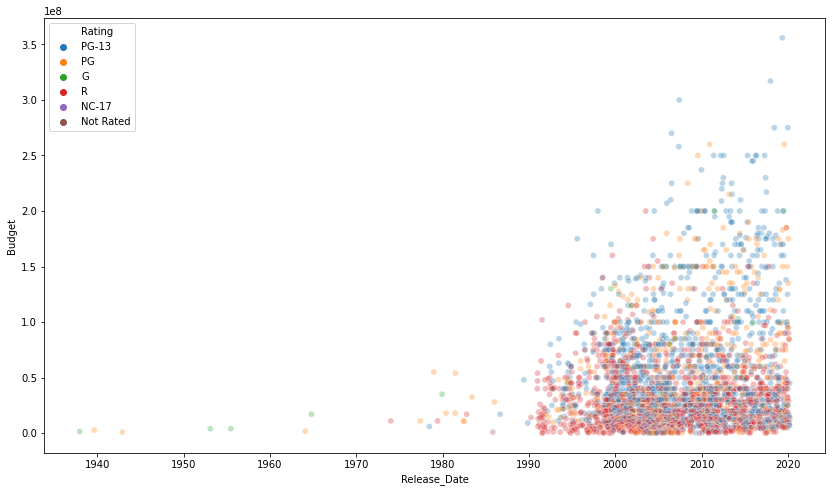

In [47]:
plt.subplots(figsize=(14,8))
plart = sns.scatterplot(data = bud, y=bud.Budget, x=bud.Release_Date, alpha=0.3, hue= bud.Rating)
#sns.scatterplot(data=bud, y = bud.Domestic_Total_Gross, x = bud.Release_Date)

## Runtime vs DTG

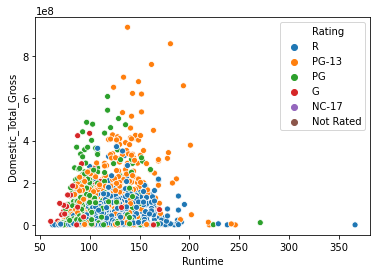

In [49]:
# df[['Runtime','Domestic_Total_Gross']]
sns.scatterplot(data=df, x=df['Runtime'], y=df['Domestic_Total_Gross'], hue = df['Rating'])

## average runtime and domestic total gross at each level of Rating

In [50]:
df.Rating.value_counts(dropna=False)

ratings_list = ['R', 'PG-13', 'PG', 'G', 'Not Rated', 'NC-17']

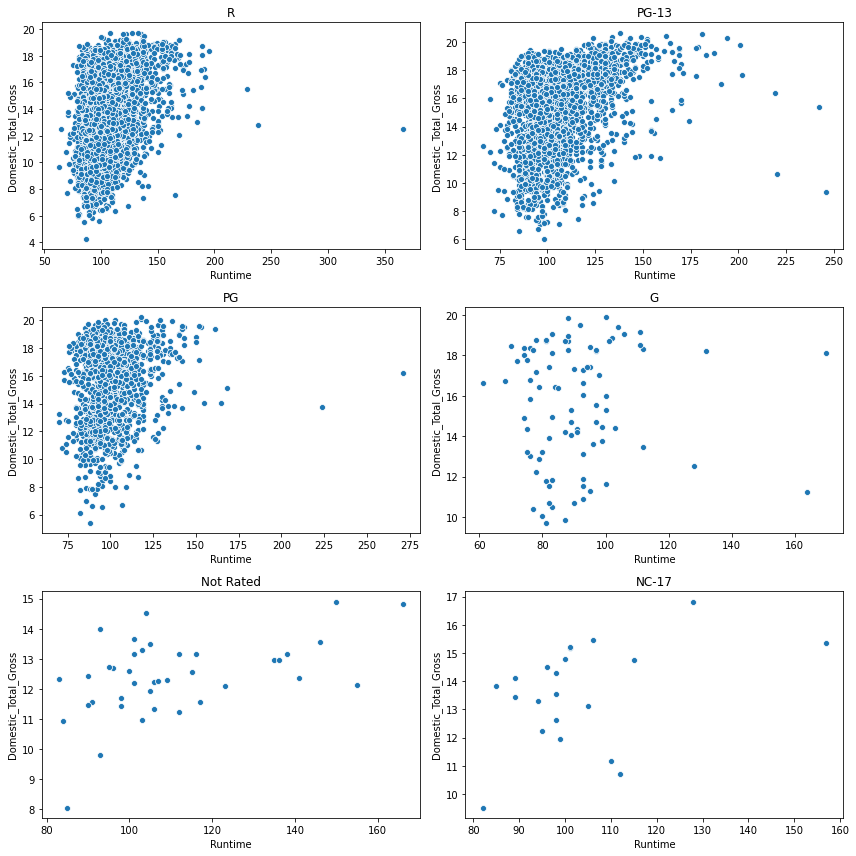

In [375]:
plt.subplots(nrows=3,ncols=2,figsize=(12,12));
for index, rating in enumerate(ratings_list):
    subplot_index = index+1
    plt.subplot(3,2, subplot_index)
    palette = sns.color_palette()
    (sns.scatterplot(data=df[df[rating] == 1],
                     x=df[df[rating] == 1]['Runtime'],
                     y=df[df[rating] == 1]['Domestic_Total_Gross'].apply(lambda x: np.log(x))),
                     )
    plt.title(rating)
    #plt.xticks([0,60,120,180,210,270,330]); plt.ylim([0,6e8]);
    plt.tight_layout()

In [378]:
df[df.Runtime > 250].sort_values(['Domestic_Total_Gross'], ascending=False)

,Movie_Title,Domestic_Distributor,Domestic_Total_Gross,Runtime,Rating,Release_Date,Budget,Cast1,Cast2,Cast3,...,Cinematographer,Profit_percent,G,NC-17,Not Rated,PG,PG-13,R,Director_Score,Distributor_Score
13624,Gettysburg,New Line Cinema,10769960,271.0,PG,1993-10-08,NaN,Tom Berenger,Martin Sheen,Stephen Lang,...,Kees Van Oostrum,NaN,0,0,0,1,0,0,15.887618,17.255899
11738,Dekalog,New Yorker Films,762214,572.0,NaN,2000-06-09,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,NaN,12.047552
10465,The Cremaster Cycle,Palm Pictures,665861,398.0,NaN,2003-04-25,NaN,Matthew Barney,NaN,NaN,...,Peter Strietmann,NaN,0,0,0,0,0,0,12.660798,12.021315
10119,LOC: Kargil,Eros International,621103,255.0,NaN,2003-12-25,NaN,Sanjay Dutt,Ajay Devgn,Saif Ali Khan,...,Karim Khatri,NaN,0,0,0,0,0,0,13.245232,13.379754
1084,"DCI 2019: Big, Loud & Live 16",Fathom Events,603320,325.0,NaN,2018-08-09,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,NaN,13.199996
10387,The Best of Youth,Miramax,274024,366.0,R,2003-06-20,NaN,Luigi Lo Cascio,Alessio Boni,Jasmine Trinca,...,Roberto Forza,NaN,0,0,0,0,0,1,12.520971,16.303792
688,War and Peace,Janus Films,148503,422.0,NaN,2019-02-15,NaN,Lyudmila Saveleva,Vyacheslav Tikhonov,Sergey Bondarchuk,...,Yu-Lan Chen,NaN,0,0,0,0,0,0,11.908360,12.002100
6273,Carlos,IFC Films,145526,334.0,NaN,2010-10-15,18000000.0,NaN,NaN,NaN,...,NaN,-0.991915,0,0,0,0,0,0,NaN,13.801787
6670,The Weathered Underground,Indican Pictures,140091,310.0,NaN,2010-01-26,NaN,Michael Ciriaco,Brea Grant,Hollis McLachlan,...,Justin Dylan Renney,NaN,0,0,0,0,0,0,11.850047,11.030203
133,Wilder vs. Ortiz,Fathom Events,139207,270.0,NaN,2019-11-23,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,NaN,13.199996


## Which director has the highest gross per movie?

### Get dummy vars and counts

In [119]:
pd.DataFrame(pd.get_dummies(data=df['Director'],prefix='Director'))

,Director_A. Dean Bell,Director_A. Muthu,Director_A. Raven Cruz,Director_A.B. Shawky,Director_A.J. Eaton,Director_A.J. Edwards,Director_A.L. Vijay,Director_A.M. Lukas,Director_A.R. Murugadoss,Director_A.T. White,...,Director_Åke Sandgren,Director_Édouard Molinaro,Director_Élie Chouraqui,Director_Éléonore Faucher,Director_Émile Gaudreault,Director_Éric Heumann,Director_Éric Rohmer,Director_Éric Tessier,Director_Étienne Chatiliez,Director_Éva Gárdos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
director_counts = df.Director.value_counts().reset_index()
director_counts.columns = ['Director','Film_Count']
director_counts

,Director,Film_Count
0,Woody Allen,39
1,Clint Eastwood,32
2,Steven Spielberg,28
3,Steven Soderbergh,26
4,Ron Howard,26
...,...,...
7783,Steven Greenstreet,1
7784,Greg MacGillivray,1
7785,Greg Marcks,1
7786,Daniel Sackheim,1


### Directors by movie count: 

TODO: split list by movies > 1 and movies <= 1

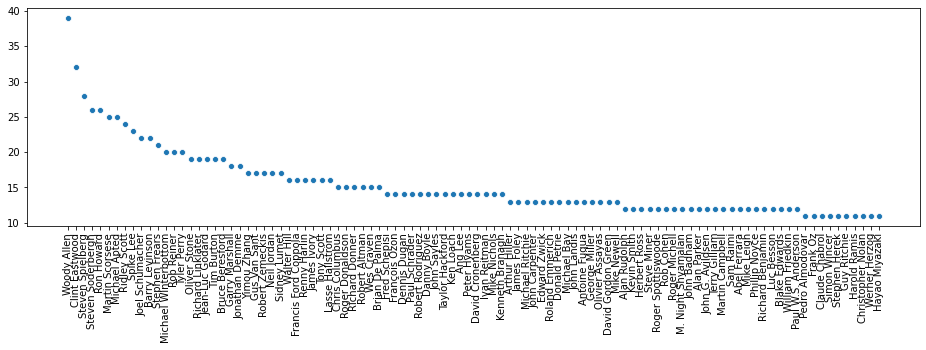

In [98]:
plt.subplots(figsize=(16,4))
plat = sns.scatterplot(data=director_counts[:100],);
plt.xticks(rotation=90);

### Directors by movie gross

Text(0.5, 1.0, 'Highest Avg Gross: Directors 1980-2020')

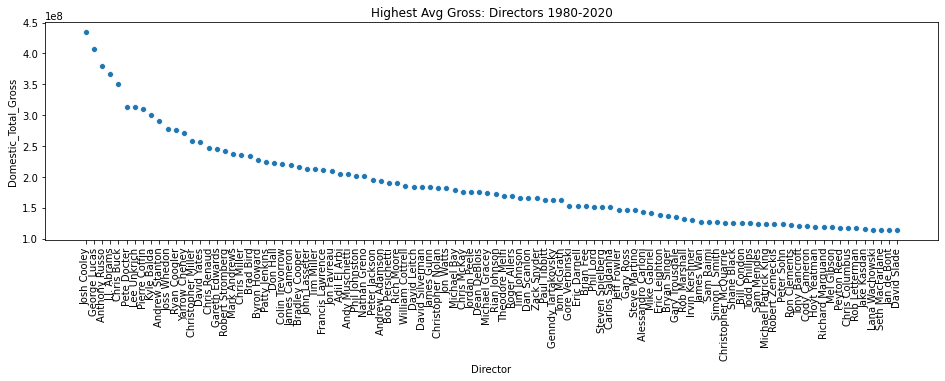

In [161]:
d_gross_mean=(df.groupby(['Director'])['Domestic_Total_Gross']
               .mean()
               .reset_index()
               .sort_values(by=['Domestic_Total_Gross'], ascending=False)
            )
#d_gross_mean['Domestic_Total_Gross'] = d_gross_mean['Domestic_Total_Gross'].apply(lambda x: np.log(x))
#d_gross_mean
plt.subplots(figsize=(16,4))
plat = sns.scatterplot(data=d_gross_mean[:100],x=d_gross_mean[:100]['Director'],y=d_gross_mean[:100]['Domestic_Total_Gross']);
#plut = sns.scatterplot(data=d_gross_mean[:100],x=d_gross_mean[:100]['Director'],y=d_gross_mean[:100]['Domestic_Total_Gross'].apply(lambda x: np.log(x)));
plt.xticks(rotation=90); plt.title('Highest Avg Gross: Directors 1980-2020')

### find an equation for the director curve

# Cast by score

In [23]:
(df[df['Domestic_Total_Gross'] > 1e6]
 .sort_values(['Cast1_Score'], ascending=False)
 [['Movie_Title','Release_Date','Domestic_Total_Gross','Domestic_Distributor',
   'Cast1','Cast1_Score','Domestic_Distributor_Score']]
 .head(12)
)

,Movie_Title,Release_Date,Domestic_Total_Gross,Domestic_Distributor,Cast1,Cast1_Score,Domestic_Distributor_Score
1564,Star Wars: Episode VIII,2017-12-13,620181382,Walt Disney Studios Motion Pictures,Daisy Ridley,20.657833,17.379955
6582,Clash of the Titans,2010-03-31,163214888,Warner Bros.,Sam Worthington,20.449497,16.957907
15871,Star Wars: Episode V,1980-05-21,290271960,Twentieth Century Fox,Mark Hamill,19.948905,18.219365
706,The Lego Movie 2: The Second Part,2019-02-06,105806508,Warner Bros.,Chris Pratt,19.781178,17.247595
15613,Star Wars: Episode VI,1983-05-25,309306177,Twentieth Century Fox,Mark Hamill,19.744129,16.684189
124,Onward,2019-11-29,61555145,Walt Disney Studios Motion Pictures,Tom Holland,19.708167,17.437761
1210,Jurassic World: Fallen Kingdom,2018-06-06,417719760,Universal Pictures,Chris Pratt,19.705758,17.248977
2949,Sisters,2015-12-18,87044645,Universal Pictures,Amy Poehler,19.691737,17.179990
2994,The Hunger Games: Mockingjay,2015-11-18,281723902,Lionsgate,Jennifer Lawrence,19.635997,15.686100
431,Spider,2019-06-28,390532085,Sony Pictures Releasing,Tom Holland,19.627254,17.235648


In [25]:
(df[df['Cast1'] == 'Mia Wasikowska']
 .sort_values('Release_Date',ascending=False)
 [['Movie_Title','Release_Date','Domestic_Total_Gross','Domestic_Distributor',
   'Cast1','Cast1_Score','Domestic_Distributor_Score']]
)


,Movie_Title,Release_Date,Domestic_Total_Gross,Domestic_Distributor,Cast1,Cast1_Score,Domestic_Distributor_Score
2688,Alice Through the Looking Glass,2016-05-25,77041381,Walt Disney Studios Motion Pictures,Mia Wasikowska,14.354469,17.352052
3325,Madame Bovary,2015-06-04,44235,Alchemy,Mia Wasikowska,15.683990,12.779789
3721,Crimson Peak,2014-10-23,31090320,Universal Pictures,Mia Wasikowska,14.354469,17.155270
4183,Tracks,2014-03-06,510007,The Weinstein Company,Mia Wasikowska,15.683990,15.206198
5334,Stoker,2012-05-31,1714221,Fox Searchlight Pictures,Mia Wasikowska,16.235226,15.700177
5767,Restless,2011-09-16,163265,Sony Pictures Classics,Mia Wasikowska,18.967164,13.906628
6070,Jane Eyre,2011-03-11,11242660,Focus Features,Mia Wasikowska,19.627224,15.869740
6626,Alice in Wonderland,2010-03-03,334191110,Walt Disney Studios Motion Pictures,Mia Wasikowska,0.000000,17.203285


In [30]:
np.mean([100,1,20, 34, 1000])
np.median([100,1,20, 34, 1000])


34.0

# Remove outliers

In [13]:
from scipy import stats

## DTG

Text(0, 0.5, 'P (Log DTG)')

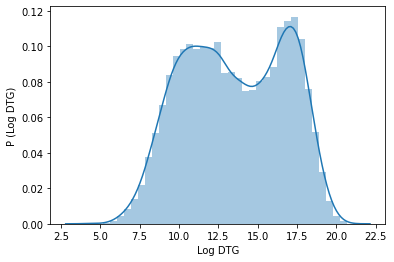

In [12]:
sns.distplot(df['Domestic_Total_Gross'].apply(lambda x: np.log(x)));
plt.xlabel('Log DTG'); plt.ylabel('P (Log DTG)')

THIS IS A BIMODAL DISTRIBUTION!

In [21]:
kernel = stats.gaussian_kde(df['Domestic_Total_Gross'].apply(lambda x: np.log(x)))
positions = np.arange(2.5, 22.5, 0.00125)
Z = np.reshape(kernel.evaluate(positions).T, (16000,))

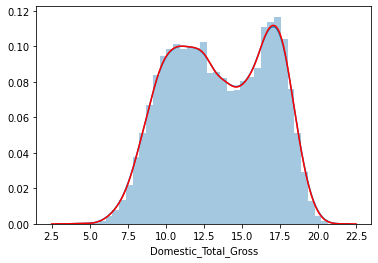

In [24]:
sns.distplot(df['Domestic_Total_Gross'].apply(lambda x: np.log(x)));
plt.plot(positions,Z, color='r')